In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import datetime

/home/saketh/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [3]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [4]:
class Logger: 
    file = None
    def __init__(self,file):
        self.file = open(file,"a")
        self.file.write("--------------------NEW LOG--------------------\n")
        self.file.write("Logger started at: "+self.timestamp()+"\n")
        
    def log(self,message):
        self.file.write(message+"\n")
    
    def timestamp(self):
        stamp = datetime.datetime.now()
        year = str(stamp.year)
        month = str(stamp.month)
        day = str(stamp.day)
        hour = str(stamp.hour)
        minute = str(stamp.minute)
        seconds = str(stamp.second)
        
        return year+"-"+month+"-"+day+" "+hour+":"+minute+":"+seconds
        
    def stop(self):
        self.file.close()

In [5]:
def RMSE(data_predict,dataY_plot):
    c = 0
    for i in range(len(data_predict)):
        c = c + abs(data_predict[i][0] - dataY_plot[i][0]) ** 2
    
    return (c ** 0.5)/len(data_predict)

In [6]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [7]:
dataset = pd.read_csv('./datasets/model-1/training-1.csv')

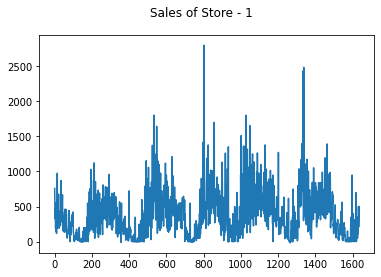

Validation Loss Decreased(inf--->0.01296) 	 Saving The Model
Validation Loss Decreased(0.01296--->0.01265) 	 Saving The Model
Validation Loss Decreased(0.01265--->0.01222) 	 Saving The Model
Validation Loss Decreased(0.01222--->0.01207) 	 Saving The Model
Validation Loss Decreased(0.01207--->0.01157) 	 Saving The Model
Validation Loss Decreased(0.01157--->0.01139) 	 Saving The Model
Validation Loss Decreased(0.01139--->0.01082) 	 Saving The Model
Validation Loss Decreased(0.01082--->0.01011) 	 Saving The Model
Validation Loss Decreased(0.01011--->0.00978) 	 Saving The Model
Validation Loss Decreased(0.00978--->0.00963) 	 Saving The Model
Validation Loss Decreased(0.00963--->0.00921) 	 Saving The Model
Validation Loss Decreased(0.00921--->0.00855) 	 Saving The Model
Validation Loss Decreased(0.00855--->0.00827) 	 Saving The Model
Validation Loss Decreased(0.00827--->0.00748) 	 Saving The Model
Validation Loss Decreased(0.00748--->0.00746) 	 Saving The Model
Validation Loss Decreased(0.0

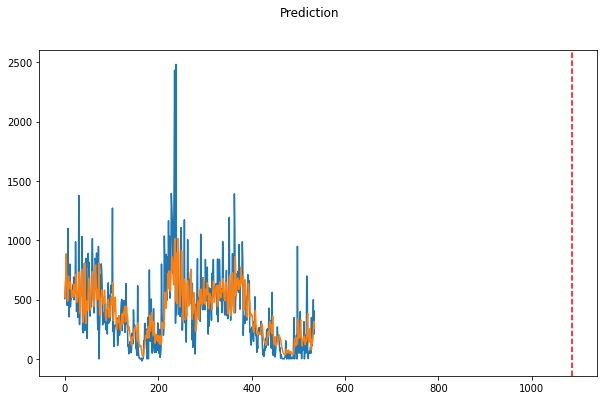

RMSE of validation set: 10.092711635401953
RMSE of entire data set: 5.692137067217044


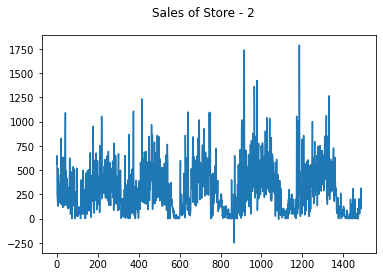

Validation Loss Decreased(inf--->0.05836) 	 Saving The Model
Validation Loss Decreased(0.05836--->0.02887) 	 Saving The Model
Validation Loss Decreased(0.02887--->0.01285) 	 Saving The Model
Validation Loss Decreased(0.01285--->0.01227) 	 Saving The Model
Validation Loss Decreased(0.01227--->0.01224) 	 Saving The Model
Validation Loss Decreased(0.01224--->0.01216) 	 Saving The Model
Validation Loss Decreased(0.01216--->0.01209) 	 Saving The Model
Validation Loss Decreased(0.01209--->0.01201) 	 Saving The Model
Validation Loss Decreased(0.01201--->0.01197) 	 Saving The Model
Validation Loss Decreased(0.01197--->0.01188) 	 Saving The Model
Validation Loss Decreased(0.01188--->0.01178) 	 Saving The Model
Validation Loss Decreased(0.01178--->0.01170) 	 Saving The Model
Validation Loss Decreased(0.01170--->0.01165) 	 Saving The Model
Validation Loss Decreased(0.01165--->0.01161) 	 Saving The Model
Validation Loss Decreased(0.01161--->0.01158) 	 Saving The Model
Validation Loss Decreased(0.0

Validation Loss Decreased(0.00847--->0.00846) 	 Saving The Model
Validation Loss Decreased(0.00846--->0.00845) 	 Saving The Model
Validation Loss Decreased(0.00845--->0.00845) 	 Saving The Model
Validation Loss Decreased(0.00845--->0.00844) 	 Saving The Model
Validation Loss Decreased(0.00844--->0.00843) 	 Saving The Model
Validation Loss Decreased(0.00843--->0.00842) 	 Saving The Model
Validation Loss Decreased(0.00842--->0.00841) 	 Saving The Model
Validation Loss Decreased(0.00841--->0.00841) 	 Saving The Model
Validation Loss Decreased(0.00841--->0.00840) 	 Saving The Model
Validation Loss Decreased(0.00840--->0.00839) 	 Saving The Model
Validation Loss Decreased(0.00839--->0.00838) 	 Saving The Model
Validation Loss Decreased(0.00838--->0.00838) 	 Saving The Model
Validation Loss Decreased(0.00838--->0.00837) 	 Saving The Model
Validation Loss Decreased(0.00837--->0.00836) 	 Saving The Model
Validation Loss Decreased(0.00836--->0.00835) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.00790--->0.00790) 	 Saving The Model
Validation Loss Decreased(0.00790--->0.00790) 	 Saving The Model
Validation Loss Decreased(0.00790--->0.00790) 	 Saving The Model
Epoch 300 		 Training Loss: 0.00911 		 Validation Loss: 0.00790
Validation Loss Decreased(0.00790--->0.00790) 	 Saving The Model
Validation Loss Decreased(0.00790--->0.00790) 	 Saving The Model
Validation Loss Decreased(0.00790--->0.00790) 	 Saving The Model
Validation Loss Decreased(0.00790--->0.00790) 	 Saving The Model
Validation Loss Decreased(0.00790--->0.00789) 	 Saving The Model
Validation Loss Decreased(0.00789--->0.00789) 	 Saving The Model
Validation Loss Decreased(0.00789--->0.00789) 	 Saving The Model
Validation Loss Decreased(0.00789--->0.00789) 	 Saving The Model
Validation Loss Decreased(0.00789--->0.00789) 	 Saving The Model
Validation Loss Decreased(0.00789--->0.00789) 	 Saving The Model
Validation Loss Decreased(0.00789--->0.00789) 	 Saving The Model
Validation Loss Decreased(

Validation Loss Decreased(0.00695--->0.00695) 	 Saving The Model
Validation Loss Decreased(0.00695--->0.00695) 	 Saving The Model
Validation Loss Decreased(0.00695--->0.00695) 	 Saving The Model
Validation Loss Decreased(0.00695--->0.00694) 	 Saving The Model
Validation Loss Decreased(0.00694--->0.00694) 	 Saving The Model
Validation Loss Decreased(0.00694--->0.00694) 	 Saving The Model
Validation Loss Decreased(0.00694--->0.00694) 	 Saving The Model
Validation Loss Decreased(0.00694--->0.00694) 	 Saving The Model
Validation Loss Decreased(0.00694--->0.00693) 	 Saving The Model
Validation Loss Decreased(0.00693--->0.00693) 	 Saving The Model
Validation Loss Decreased(0.00693--->0.00693) 	 Saving The Model
Validation Loss Decreased(0.00693--->0.00693) 	 Saving The Model
Validation Loss Decreased(0.00693--->0.00693) 	 Saving The Model
Validation Loss Decreased(0.00693--->0.00692) 	 Saving The Model
Validation Loss Decreased(0.00692--->0.00692) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.00676--->0.00676) 	 Saving The Model
Validation Loss Decreased(0.00676--->0.00676) 	 Saving The Model
Validation Loss Decreased(0.00676--->0.00676) 	 Saving The Model
Validation Loss Decreased(0.00676--->0.00676) 	 Saving The Model
Validation Loss Decreased(0.00676--->0.00676) 	 Saving The Model
Validation Loss Decreased(0.00676--->0.00676) 	 Saving The Model
Epoch 700 		 Training Loss: 0.00764 		 Validation Loss: 0.00676
Validation Loss Decreased(0.00676--->0.00676) 	 Saving The Model
Validation Loss Decreased(0.00676--->0.00676) 	 Saving The Model
Validation Loss Decreased(0.00676--->0.00676) 	 Saving The Model
Validation Loss Decreased(0.00676--->0.00675) 	 Saving The Model
Validation Loss Decreased(0.00675--->0.00675) 	 Saving The Model
Validation Loss Decreased(0.00675--->0.00675) 	 Saving The Model
Validation Loss Decreased(0.00675--->0.00675) 	 Saving The Model
Validation Loss Decreased(0.00675--->0.00675) 	 Saving The Model
Validation Loss Decreased(

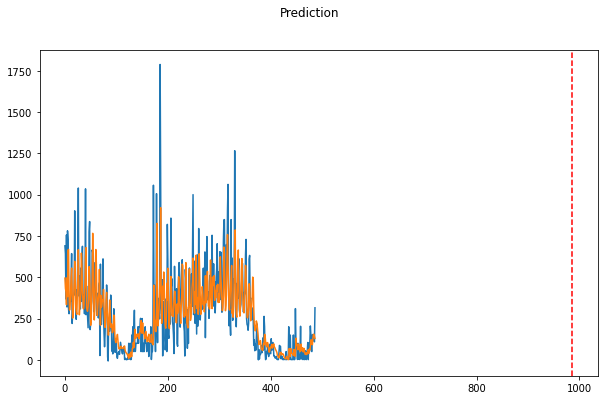

RMSE of validation set: 7.55988057960904
RMSE of entire data set: 4.508197167847628


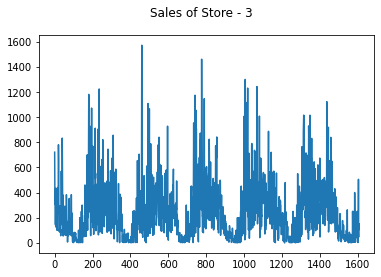

Validation Loss Decreased(inf--->0.01995) 	 Saving The Model
Validation Loss Decreased(0.01995--->0.01733) 	 Saving The Model
Validation Loss Decreased(0.01733--->0.01632) 	 Saving The Model
Validation Loss Decreased(0.01632--->0.01621) 	 Saving The Model
Validation Loss Decreased(0.01621--->0.01590) 	 Saving The Model
Validation Loss Decreased(0.01590--->0.01530) 	 Saving The Model
Validation Loss Decreased(0.01530--->0.01501) 	 Saving The Model
Validation Loss Decreased(0.01501--->0.01454) 	 Saving The Model
Validation Loss Decreased(0.01454--->0.01377) 	 Saving The Model
Validation Loss Decreased(0.01377--->0.01335) 	 Saving The Model
Validation Loss Decreased(0.01335--->0.01320) 	 Saving The Model
Validation Loss Decreased(0.01320--->0.01271) 	 Saving The Model
Validation Loss Decreased(0.01271--->0.01208) 	 Saving The Model
Validation Loss Decreased(0.01208--->0.01205) 	 Saving The Model
Validation Loss Decreased(0.01205--->0.01179) 	 Saving The Model
Validation Loss Decreased(0.0

Epoch 1600 		 Training Loss: 0.00287 		 Validation Loss: 0.02177
Epoch 1700 		 Training Loss: 0.00279 		 Validation Loss: 0.02198
Epoch 1800 		 Training Loss: 0.00252 		 Validation Loss: 0.02242
Epoch 1900 		 Training Loss: 0.00237 		 Validation Loss: 0.02294
Epoch 2000 		 Training Loss: 0.00208 		 Validation Loss: 0.02324
Epoch 2100 		 Training Loss: 0.00195 		 Validation Loss: 0.02411
Stopping the training early		Model saved
	Training Loss:  0.00189448450691998
	Validation Loss:  0.01011685561388731


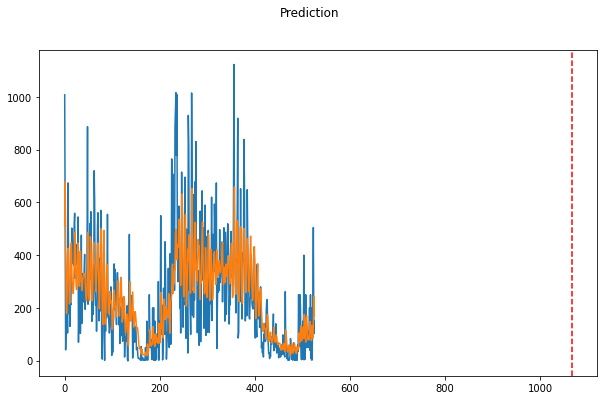

RMSE of validation set: 6.898562961810054
RMSE of entire data set: 4.309053308167354


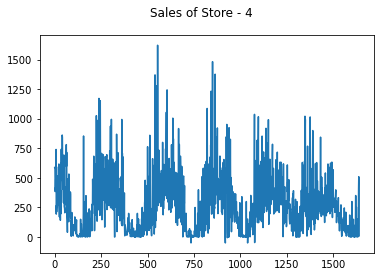

Validation Loss Decreased(inf--->0.01306) 	 Saving The Model
Validation Loss Decreased(0.01306--->0.01290) 	 Saving The Model
Validation Loss Decreased(0.01290--->0.01189) 	 Saving The Model
Validation Loss Decreased(0.01189--->0.01185) 	 Saving The Model
Validation Loss Decreased(0.01185--->0.01158) 	 Saving The Model
Validation Loss Decreased(0.01158--->0.01115) 	 Saving The Model
Validation Loss Decreased(0.01115--->0.01106) 	 Saving The Model
Validation Loss Decreased(0.01106--->0.01083) 	 Saving The Model
Validation Loss Decreased(0.01083--->0.01021) 	 Saving The Model
Validation Loss Decreased(0.01021--->0.00997) 	 Saving The Model
Validation Loss Decreased(0.00997--->0.00988) 	 Saving The Model
Validation Loss Decreased(0.00988--->0.00958) 	 Saving The Model
Validation Loss Decreased(0.00958--->0.00934) 	 Saving The Model
Validation Loss Decreased(0.00934--->0.00903) 	 Saving The Model
Validation Loss Decreased(0.00903--->0.00899) 	 Saving The Model
Validation Loss Decreased(0.0

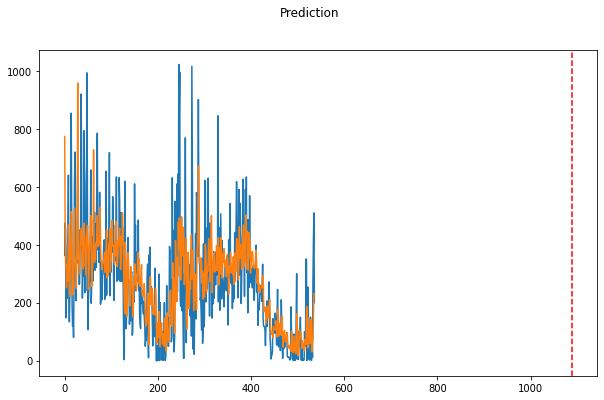

RMSE of validation set: 6.381454364064033
RMSE of entire data set: 3.981911484134968


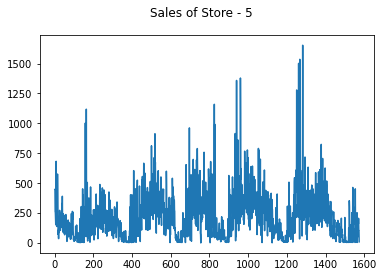

Validation Loss Decreased(inf--->0.03932) 	 Saving The Model
Validation Loss Decreased(0.03932--->0.02108) 	 Saving The Model
Validation Loss Decreased(0.02108--->0.01789) 	 Saving The Model
Validation Loss Decreased(0.01789--->0.01744) 	 Saving The Model
Validation Loss Decreased(0.01744--->0.01665) 	 Saving The Model
Validation Loss Decreased(0.01665--->0.01665) 	 Saving The Model
Validation Loss Decreased(0.01665--->0.01619) 	 Saving The Model
Validation Loss Decreased(0.01619--->0.01589) 	 Saving The Model
Validation Loss Decreased(0.01589--->0.01575) 	 Saving The Model
Validation Loss Decreased(0.01575--->0.01562) 	 Saving The Model
Validation Loss Decreased(0.01562--->0.01543) 	 Saving The Model
Validation Loss Decreased(0.01543--->0.01526) 	 Saving The Model
Validation Loss Decreased(0.01526--->0.01513) 	 Saving The Model
Validation Loss Decreased(0.01513--->0.01505) 	 Saving The Model
Validation Loss Decreased(0.01505--->0.01501) 	 Saving The Model
Validation Loss Decreased(0.0

Validation Loss Decreased(0.00941--->0.00941) 	 Saving The Model
Validation Loss Decreased(0.00941--->0.00941) 	 Saving The Model
Validation Loss Decreased(0.00941--->0.00941) 	 Saving The Model
Validation Loss Decreased(0.00941--->0.00941) 	 Saving The Model
Validation Loss Decreased(0.00941--->0.00941) 	 Saving The Model
Validation Loss Decreased(0.00941--->0.00941) 	 Saving The Model
Validation Loss Decreased(0.00941--->0.00941) 	 Saving The Model
Validation Loss Decreased(0.00941--->0.00941) 	 Saving The Model
Validation Loss Decreased(0.00941--->0.00941) 	 Saving The Model
Validation Loss Decreased(0.00941--->0.00941) 	 Saving The Model
Validation Loss Decreased(0.00941--->0.00940) 	 Saving The Model
Validation Loss Decreased(0.00940--->0.00940) 	 Saving The Model
Validation Loss Decreased(0.00940--->0.00940) 	 Saving The Model
Validation Loss Decreased(0.00940--->0.00940) 	 Saving The Model
Validation Loss Decreased(0.00940--->0.00940) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased(0.00937--->0.00937) 	 Saving The Model
Validation Loss Decreased

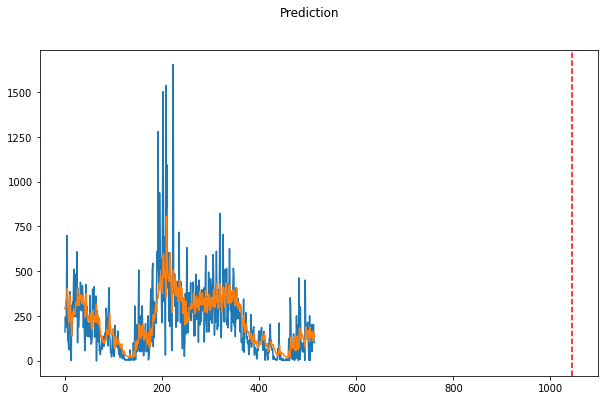

RMSE of validation set: 6.957742893996261
RMSE of entire data set: 3.8852237404383376


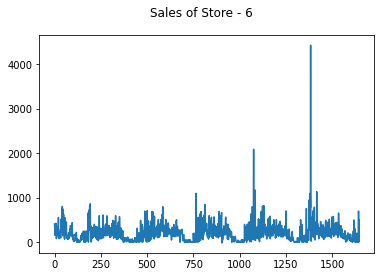

Validation Loss Decreased(inf--->0.04554) 	 Saving The Model
Validation Loss Decreased(0.04554--->0.01726) 	 Saving The Model
Validation Loss Decreased(0.01726--->0.00382) 	 Saving The Model
Validation Loss Decreased(0.00382--->0.00315) 	 Saving The Model
Validation Loss Decreased(0.00315--->0.00315) 	 Saving The Model
Validation Loss Decreased(0.00315--->0.00311) 	 Saving The Model
Validation Loss Decreased(0.00311--->0.00309) 	 Saving The Model
Validation Loss Decreased(0.00309--->0.00307) 	 Saving The Model
Validation Loss Decreased(0.00307--->0.00306) 	 Saving The Model
Validation Loss Decreased(0.00306--->0.00305) 	 Saving The Model
Validation Loss Decreased(0.00305--->0.00305) 	 Saving The Model
Validation Loss Decreased(0.00305--->0.00305) 	 Saving The Model
Validation Loss Decreased(0.00305--->0.00305) 	 Saving The Model
Validation Loss Decreased(0.00305--->0.00305) 	 Saving The Model
Validation Loss Decreased(0.00305--->0.00305) 	 Saving The Model
Validation Loss Decreased(0.0

Epoch 200 		 Training Loss: 0.00128 		 Validation Loss: 0.00282
Validation Loss Decreased(0.00282--->0.00282) 	 Saving The Model
Validation Loss Decreased(0.00282--->0.00282) 	 Saving The Model
Validation Loss Decreased(0.00282--->0.00282) 	 Saving The Model
Validation Loss Decreased(0.00282--->0.00282) 	 Saving The Model
Validation Loss Decreased(0.00282--->0.00281) 	 Saving The Model
Validation Loss Decreased(0.00281--->0.00281) 	 Saving The Model
Validation Loss Decreased(0.00281--->0.00281) 	 Saving The Model
Validation Loss Decreased(0.00281--->0.00281) 	 Saving The Model
Validation Loss Decreased(0.00281--->0.00281) 	 Saving The Model
Validation Loss Decreased(0.00281--->0.00281) 	 Saving The Model
Validation Loss Decreased(0.00281--->0.00281) 	 Saving The Model
Validation Loss Decreased(0.00281--->0.00281) 	 Saving The Model
Validation Loss Decreased(0.00281--->0.00280) 	 Saving The Model
Validation Loss Decreased(0.00280--->0.00280) 	 Saving The Model
Validation Loss Decreased(

Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased(0.00274--->0.00274) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased(0.00272--->0.00272) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased(0.00269--->0.00269) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased(0.00265--->0.00265) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased(0.00261--->0.00261) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased(0.00259--->0.00259) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.00258--->0.00258) 	 Saving The Model
Validation Loss Decreased(0.00258--->0.00258) 	 Saving The Model
Validation Loss Decreased(0.00258--->0.00258) 	 Saving The Model
Validation Loss Decreased(0.00258--->0.00258) 	 Saving The Model
Validation Loss Decreased(0.00258--->0.00258) 	 Saving The Model
Validation Loss Decreased(0.00258--->0.00258) 	 Saving The Model
Validation Loss Decreased(0.00258--->0.00258) 	 Saving The Model
Validation Loss Decreased(0.00258--->0.00258) 	 Saving The Model
Epoch 1100 		 Training Loss: 0.00110 		 Validation Loss: 0.00258
Validation Loss Decreased(0.00258--->0.00258) 	 Saving The Model
Validation Loss Decreased(0.00258--->0.00258) 	 Saving The Model
Validation Loss Decreased(0.00258--->0.00258) 	 Saving The Model
Validation Loss Decreased(0.00258--->0.00258) 	 Saving The Model
Epoch 1200 		 Training Loss: 0.00109 		 Validation Loss: 0.00259
Epoch 1300 		 Training Loss: 0.00109 		 Validation Loss: 0.00259
Epoch 1400 		 Training Lo

Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Validation Loss Decreased(0.00256--->0.00256) 	 Saving The Model
Epoch 1800 		 Training Lo

Validation Loss Decreased(0.00244--->0.00244) 	 Saving The Model
Validation Loss Decreased(0.00244--->0.00244) 	 Saving The Model
Validation Loss Decreased(0.00244--->0.00244) 	 Saving The Model
Validation Loss Decreased(0.00244--->0.00244) 	 Saving The Model
Validation Loss Decreased(0.00244--->0.00244) 	 Saving The Model
Validation Loss Decreased(0.00244--->0.00244) 	 Saving The Model
Validation Loss Decreased(0.00244--->0.00243) 	 Saving The Model
Validation Loss Decreased(0.00243--->0.00243) 	 Saving The Model
Validation Loss Decreased(0.00243--->0.00243) 	 Saving The Model
Epoch 2000 		 Training Loss: 0.00111 		 Validation Loss: 0.00251
Epoch 2100 		 Training Loss: 0.00108 		 Validation Loss: 0.00245
Epoch 2200 		 Training Loss: 0.00102 		 Validation Loss: 0.00266
Epoch 2300 		 Training Loss: 0.00096 		 Validation Loss: 0.00249
Epoch 2400 		 Training Loss: 0.00095 		 Validation Loss: 0.00249
Epoch 2500 		 Training Loss: 0.00094 		 Validation Loss: 0.00250
Epoch 2600 		 Training Lo

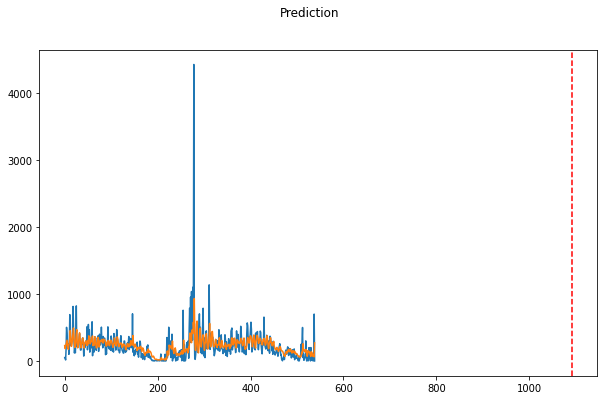

RMSE of validation set: 9.42858916225985
RMSE of entire data set: 4.224424311386954


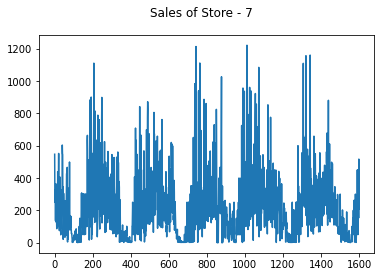

Validation Loss Decreased(inf--->0.15636) 	 Saving The Model
Validation Loss Decreased(0.15636--->0.11980) 	 Saving The Model
Validation Loss Decreased(0.11980--->0.08519) 	 Saving The Model
Validation Loss Decreased(0.08519--->0.05365) 	 Saving The Model
Validation Loss Decreased(0.05365--->0.02850) 	 Saving The Model
Validation Loss Decreased(0.02850--->0.01806) 	 Saving The Model
Validation Loss Decreased(0.01806--->0.01786) 	 Saving The Model
Validation Loss Decreased(0.01786--->0.01766) 	 Saving The Model
Validation Loss Decreased(0.01766--->0.01755) 	 Saving The Model
Validation Loss Decreased(0.01755--->0.01749) 	 Saving The Model
Validation Loss Decreased(0.01749--->0.01746) 	 Saving The Model
Validation Loss Decreased(0.01746--->0.01743) 	 Saving The Model
Validation Loss Decreased(0.01743--->0.01738) 	 Saving The Model
Validation Loss Decreased(0.01738--->0.01732) 	 Saving The Model
Validation Loss Decreased(0.01732--->0.01725) 	 Saving The Model
Validation Loss Decreased(0.0

Validation Loss Decreased(0.01378--->0.01377) 	 Saving The Model
Validation Loss Decreased(0.01377--->0.01376) 	 Saving The Model
Validation Loss Decreased(0.01376--->0.01376) 	 Saving The Model
Validation Loss Decreased(0.01376--->0.01375) 	 Saving The Model
Validation Loss Decreased(0.01375--->0.01375) 	 Saving The Model
Validation Loss Decreased(0.01375--->0.01375) 	 Saving The Model
Validation Loss Decreased(0.01375--->0.01375) 	 Saving The Model
Validation Loss Decreased(0.01375--->0.01374) 	 Saving The Model
Validation Loss Decreased(0.01374--->0.01374) 	 Saving The Model
Validation Loss Decreased(0.01374--->0.01374) 	 Saving The Model
Validation Loss Decreased(0.01374--->0.01374) 	 Saving The Model
Validation Loss Decreased(0.01374--->0.01374) 	 Saving The Model
Epoch 200 		 Training Loss: 0.02075 		 Validation Loss: 0.01375
Epoch 300 		 Training Loss: 0.02027 		 Validation Loss: 0.01396
Epoch 400 		 Training Loss: 0.01995 		 Validation Loss: 0.01399
Validation Loss Decreased(0.

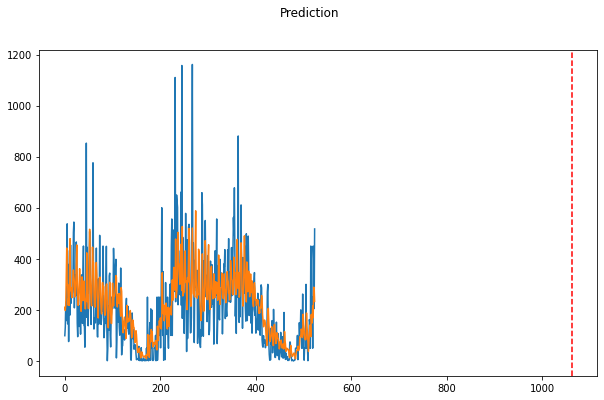

RMSE of validation set: 6.180544809330339
RMSE of entire data set: 3.9341260919205308


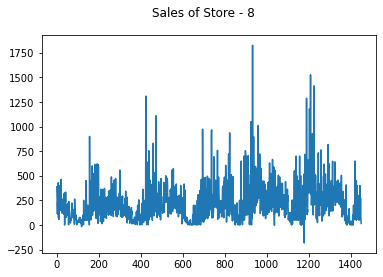

Validation Loss Decreased(inf--->0.08618) 	 Saving The Model
Validation Loss Decreased(0.08618--->0.05361) 	 Saving The Model
Validation Loss Decreased(0.05361--->0.02669) 	 Saving The Model
Validation Loss Decreased(0.02669--->0.01036) 	 Saving The Model
Validation Loss Decreased(0.01036--->0.00916) 	 Saving The Model
Validation Loss Decreased(0.00916--->0.00913) 	 Saving The Model
Validation Loss Decreased(0.00913--->0.00898) 	 Saving The Model
Validation Loss Decreased(0.00898--->0.00894) 	 Saving The Model
Validation Loss Decreased(0.00894--->0.00892) 	 Saving The Model
Validation Loss Decreased(0.00892--->0.00888) 	 Saving The Model
Validation Loss Decreased(0.00888--->0.00887) 	 Saving The Model
Validation Loss Decreased(0.00887--->0.00887) 	 Saving The Model
Validation Loss Decreased(0.00887--->0.00885) 	 Saving The Model
Validation Loss Decreased(0.00885--->0.00882) 	 Saving The Model
Validation Loss Decreased(0.00882--->0.00879) 	 Saving The Model
Validation Loss Decreased(0.0

Validation Loss Decreased(0.00794--->0.00793) 	 Saving The Model
Validation Loss Decreased(0.00793--->0.00792) 	 Saving The Model
Validation Loss Decreased(0.00792--->0.00792) 	 Saving The Model
Validation Loss Decreased(0.00792--->0.00791) 	 Saving The Model
Validation Loss Decreased(0.00791--->0.00791) 	 Saving The Model
Validation Loss Decreased(0.00791--->0.00790) 	 Saving The Model
Validation Loss Decreased(0.00790--->0.00790) 	 Saving The Model
Validation Loss Decreased(0.00790--->0.00789) 	 Saving The Model
Validation Loss Decreased(0.00789--->0.00789) 	 Saving The Model
Validation Loss Decreased(0.00789--->0.00788) 	 Saving The Model
Validation Loss Decreased(0.00788--->0.00788) 	 Saving The Model
Validation Loss Decreased(0.00788--->0.00787) 	 Saving The Model
Validation Loss Decreased(0.00787--->0.00787) 	 Saving The Model
Validation Loss Decreased(0.00787--->0.00786) 	 Saving The Model
Validation Loss Decreased(0.00786--->0.00786) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.00735--->0.00735) 	 Saving The Model
Validation Loss Decreased(0.00735--->0.00735) 	 Saving The Model
Validation Loss Decreased(0.00735--->0.00735) 	 Saving The Model
Validation Loss Decreased(0.00735--->0.00734) 	 Saving The Model
Validation Loss Decreased(0.00734--->0.00734) 	 Saving The Model
Validation Loss Decreased(0.00734--->0.00734) 	 Saving The Model
Validation Loss Decreased(0.00734--->0.00734) 	 Saving The Model
Validation Loss Decreased(0.00734--->0.00734) 	 Saving The Model
Validation Loss Decreased(0.00734--->0.00733) 	 Saving The Model
Validation Loss Decreased(0.00733--->0.00733) 	 Saving The Model
Validation Loss Decreased(0.00733--->0.00733) 	 Saving The Model
Validation Loss Decreased(0.00733--->0.00732) 	 Saving The Model
Validation Loss Decreased(0.00732--->0.00732) 	 Saving The Model
Validation Loss Decreased(0.00732--->0.00732) 	 Saving The Model
Validation Loss Decreased(0.00732--->0.00732) 	 Saving The Model
Validation Loss Decreased

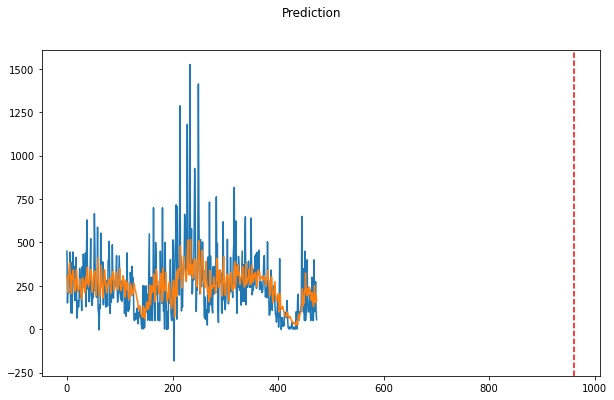

RMSE of validation set: 7.830270817510784
RMSE of entire data set: 4.216230370087127


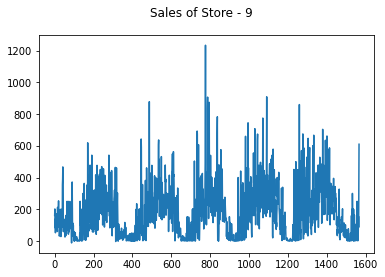

Validation Loss Decreased(inf--->0.01919) 	 Saving The Model
Validation Loss Decreased(0.01919--->0.01854) 	 Saving The Model
Validation Loss Decreased(0.01854--->0.01759) 	 Saving The Model
Validation Loss Decreased(0.01759--->0.01722) 	 Saving The Model
Validation Loss Decreased(0.01722--->0.01698) 	 Saving The Model
Validation Loss Decreased(0.01698--->0.01670) 	 Saving The Model
Validation Loss Decreased(0.01670--->0.01650) 	 Saving The Model
Validation Loss Decreased(0.01650--->0.01606) 	 Saving The Model
Validation Loss Decreased(0.01606--->0.01518) 	 Saving The Model
Validation Loss Decreased(0.01518--->0.01447) 	 Saving The Model
Validation Loss Decreased(0.01447--->0.01401) 	 Saving The Model
Validation Loss Decreased(0.01401--->0.01352) 	 Saving The Model
Validation Loss Decreased(0.01352--->0.01302) 	 Saving The Model
Validation Loss Decreased(0.01302--->0.01289) 	 Saving The Model
Validation Loss Decreased(0.01289--->0.01243) 	 Saving The Model
Validation Loss Decreased(0.0

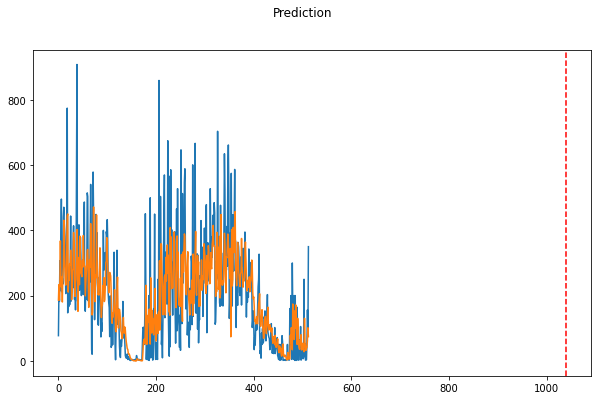

RMSE of validation set: 5.6162163846431525
RMSE of entire data set: 3.0012314738081534


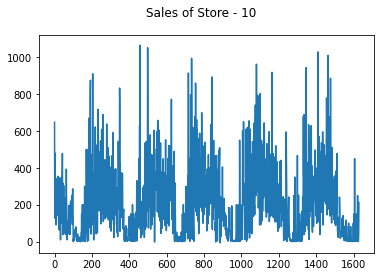

Validation Loss Decreased(inf--->0.05283) 	 Saving The Model
Validation Loss Decreased(0.05283--->0.04178) 	 Saving The Model
Validation Loss Decreased(0.04178--->0.03379) 	 Saving The Model
Validation Loss Decreased(0.03379--->0.02906) 	 Saving The Model
Validation Loss Decreased(0.02906--->0.02842) 	 Saving The Model
Validation Loss Decreased(0.02842--->0.02788) 	 Saving The Model
Validation Loss Decreased(0.02788--->0.02747) 	 Saving The Model
Validation Loss Decreased(0.02747--->0.02704) 	 Saving The Model
Validation Loss Decreased(0.02704--->0.02661) 	 Saving The Model
Validation Loss Decreased(0.02661--->0.02624) 	 Saving The Model
Validation Loss Decreased(0.02624--->0.02598) 	 Saving The Model
Validation Loss Decreased(0.02598--->0.02583) 	 Saving The Model
Validation Loss Decreased(0.02583--->0.02576) 	 Saving The Model
Validation Loss Decreased(0.02576--->0.02571) 	 Saving The Model
Validation Loss Decreased(0.02571--->0.02563) 	 Saving The Model
Validation Loss Decreased(0.0

Validation Loss Decreased(0.01672--->0.01671) 	 Saving The Model
Validation Loss Decreased(0.01671--->0.01671) 	 Saving The Model
Validation Loss Decreased(0.01671--->0.01671) 	 Saving The Model
Validation Loss Decreased(0.01671--->0.01671) 	 Saving The Model
Validation Loss Decreased(0.01671--->0.01670) 	 Saving The Model
Validation Loss Decreased(0.01670--->0.01670) 	 Saving The Model
Validation Loss Decreased(0.01670--->0.01670) 	 Saving The Model
Validation Loss Decreased(0.01670--->0.01670) 	 Saving The Model
Validation Loss Decreased(0.01670--->0.01670) 	 Saving The Model
Validation Loss Decreased(0.01670--->0.01669) 	 Saving The Model
Validation Loss Decreased(0.01669--->0.01669) 	 Saving The Model
Validation Loss Decreased(0.01669--->0.01669) 	 Saving The Model
Validation Loss Decreased(0.01669--->0.01669) 	 Saving The Model
Validation Loss Decreased(0.01669--->0.01669) 	 Saving The Model
Validation Loss Decreased(0.01669--->0.01669) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.01543--->0.01539) 	 Saving The Model
Validation Loss Decreased(0.01539--->0.01537) 	 Saving The Model
Validation Loss Decreased(0.01537--->0.01536) 	 Saving The Model
Validation Loss Decreased(0.01536--->0.01535) 	 Saving The Model
Validation Loss Decreased(0.01535--->0.01532) 	 Saving The Model
Validation Loss Decreased(0.01532--->0.01531) 	 Saving The Model
Epoch 400 		 Training Loss: 0.01764 		 Validation Loss: 0.01531
Epoch 500 		 Training Loss: 0.01630 		 Validation Loss: 0.01706
Epoch 600 		 Training Loss: 0.01423 		 Validation Loss: 0.01965
Epoch 700 		 Training Loss: 0.01125 		 Validation Loss: 0.02377
Epoch 800 		 Training Loss: 0.00981 		 Validation Loss: 0.02634
Epoch 900 		 Training Loss: 0.00807 		 Validation Loss: 0.02793
Epoch 1000 		 Training Loss: 0.00678 		 Validation Loss: 0.02905
Epoch 1100 		 Training Loss: 0.00616 		 Validation Loss: 0.03265
Epoch 1200 		 Training Loss: 0.00538 		 Validation Loss: 0.03346
Epoch 1300 		 Training Loss: 0.

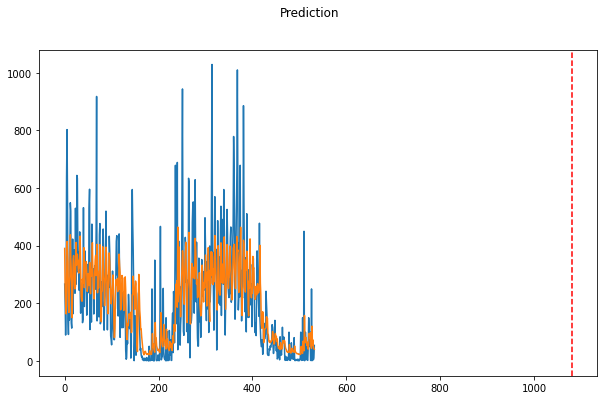

RMSE of validation set: 5.7448660360025405
RMSE of entire data set: 3.4692356066122936


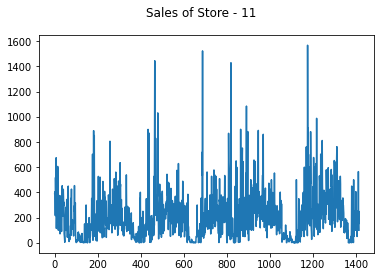

Validation Loss Decreased(inf--->0.01627) 	 Saving The Model
Validation Loss Decreased(0.01627--->0.01587) 	 Saving The Model
Validation Loss Decreased(0.01587--->0.01481) 	 Saving The Model
Validation Loss Decreased(0.01481--->0.01432) 	 Saving The Model
Validation Loss Decreased(0.01432--->0.01415) 	 Saving The Model
Validation Loss Decreased(0.01415--->0.01400) 	 Saving The Model
Validation Loss Decreased(0.01400--->0.01376) 	 Saving The Model
Validation Loss Decreased(0.01376--->0.01319) 	 Saving The Model
Validation Loss Decreased(0.01319--->0.01278) 	 Saving The Model
Validation Loss Decreased(0.01278--->0.01250) 	 Saving The Model
Validation Loss Decreased(0.01250--->0.01226) 	 Saving The Model
Validation Loss Decreased(0.01226--->0.01218) 	 Saving The Model
Validation Loss Decreased(0.01218--->0.01209) 	 Saving The Model
Validation Loss Decreased(0.01209--->0.01154) 	 Saving The Model
Validation Loss Decreased(0.01154--->0.01092) 	 Saving The Model
Validation Loss Decreased(0.0

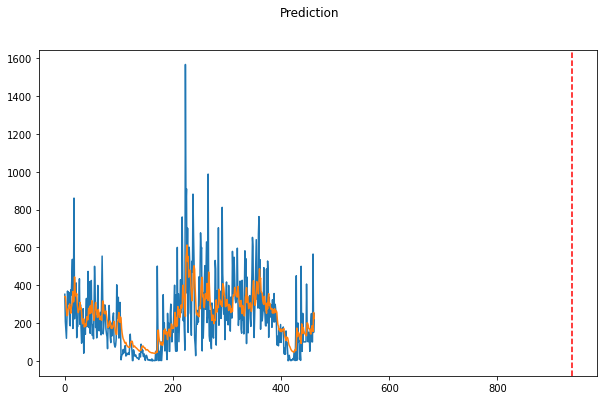

RMSE of validation set: 7.251289721324238
RMSE of entire data set: 4.301309268314179


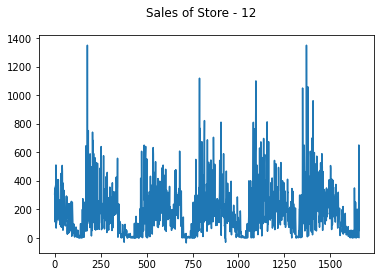

Validation Loss Decreased(inf--->0.19419) 	 Saving The Model
Validation Loss Decreased(0.19419--->0.14635) 	 Saving The Model
Validation Loss Decreased(0.14635--->0.10732) 	 Saving The Model
Validation Loss Decreased(0.10732--->0.07491) 	 Saving The Model
Validation Loss Decreased(0.07491--->0.04825) 	 Saving The Model
Validation Loss Decreased(0.04825--->0.02794) 	 Saving The Model
Validation Loss Decreased(0.02794--->0.01610) 	 Saving The Model
Validation Loss Decreased(0.01610--->0.01564) 	 Saving The Model
Validation Loss Decreased(0.01564--->0.01499) 	 Saving The Model
Validation Loss Decreased(0.01499--->0.01427) 	 Saving The Model
Validation Loss Decreased(0.01427--->0.01412) 	 Saving The Model
Validation Loss Decreased(0.01412--->0.01396) 	 Saving The Model
Validation Loss Decreased(0.01396--->0.01396) 	 Saving The Model
Validation Loss Decreased(0.01396--->0.01395) 	 Saving The Model
Validation Loss Decreased(0.01395--->0.01385) 	 Saving The Model
Validation Loss Decreased(0.0

Validation Loss Decreased(0.01207--->0.01207) 	 Saving The Model
Validation Loss Decreased(0.01207--->0.01206) 	 Saving The Model
Validation Loss Decreased(0.01206--->0.01206) 	 Saving The Model
Validation Loss Decreased(0.01206--->0.01205) 	 Saving The Model
Validation Loss Decreased(0.01205--->0.01205) 	 Saving The Model
Validation Loss Decreased(0.01205--->0.01204) 	 Saving The Model
Validation Loss Decreased(0.01204--->0.01204) 	 Saving The Model
Validation Loss Decreased(0.01204--->0.01203) 	 Saving The Model
Validation Loss Decreased(0.01203--->0.01203) 	 Saving The Model
Validation Loss Decreased(0.01203--->0.01203) 	 Saving The Model
Validation Loss Decreased(0.01203--->0.01202) 	 Saving The Model
Validation Loss Decreased(0.01202--->0.01202) 	 Saving The Model
Validation Loss Decreased(0.01202--->0.01201) 	 Saving The Model
Validation Loss Decreased(0.01201--->0.01201) 	 Saving The Model
Validation Loss Decreased(0.01201--->0.01200) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.01152--->0.01152) 	 Saving The Model
Validation Loss Decreased(0.01152--->0.01152) 	 Saving The Model
Validation Loss Decreased(0.01152--->0.01151) 	 Saving The Model
Validation Loss Decreased(0.01151--->0.01151) 	 Saving The Model
Validation Loss Decreased(0.01151--->0.01151) 	 Saving The Model
Validation Loss Decreased(0.01151--->0.01150) 	 Saving The Model
Validation Loss Decreased(0.01150--->0.01150) 	 Saving The Model
Validation Loss Decreased(0.01150--->0.01150) 	 Saving The Model
Validation Loss Decreased(0.01150--->0.01149) 	 Saving The Model
Validation Loss Decreased(0.01149--->0.01149) 	 Saving The Model
Validation Loss Decreased(0.01149--->0.01149) 	 Saving The Model
Validation Loss Decreased(0.01149--->0.01148) 	 Saving The Model
Validation Loss Decreased(0.01148--->0.01148) 	 Saving The Model
Validation Loss Decreased(0.01148--->0.01148) 	 Saving The Model
Validation Loss Decreased(0.01148--->0.01147) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.01122--->0.01122) 	 Saving The Model
Validation Loss Decreased(0.01122--->0.01122) 	 Saving The Model
Validation Loss Decreased(0.01122--->0.01122) 	 Saving The Model
Validation Loss Decreased(0.01122--->0.01121) 	 Saving The Model
Validation Loss Decreased(0.01121--->0.01121) 	 Saving The Model
Validation Loss Decreased(0.01121--->0.01121) 	 Saving The Model
Validation Loss Decreased(0.01121--->0.01121) 	 Saving The Model
Validation Loss Decreased(0.01121--->0.01121) 	 Saving The Model
Validation Loss Decreased(0.01121--->0.01120) 	 Saving The Model
Validation Loss Decreased(0.01120--->0.01120) 	 Saving The Model
Validation Loss Decreased(0.01120--->0.01120) 	 Saving The Model
Validation Loss Decreased(0.01120--->0.01120) 	 Saving The Model
Validation Loss Decreased(0.01120--->0.01120) 	 Saving The Model
Validation Loss Decreased(0.01120--->0.01120) 	 Saving The Model
Validation Loss Decreased(0.01120--->0.01119) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.01102--->0.01102) 	 Saving The Model
Validation Loss Decreased(0.01102--->0.01102) 	 Saving The Model
Validation Loss Decreased(0.01102--->0.01101) 	 Saving The Model
Validation Loss Decreased(0.01101--->0.01101) 	 Saving The Model
Validation Loss Decreased(0.01101--->0.01101) 	 Saving The Model
Validation Loss Decreased(0.01101--->0.01101) 	 Saving The Model
Validation Loss Decreased(0.01101--->0.01101) 	 Saving The Model
Validation Loss Decreased(0.01101--->0.01101) 	 Saving The Model
Validation Loss Decreased(0.01101--->0.01100) 	 Saving The Model
Validation Loss Decreased(0.01100--->0.01100) 	 Saving The Model
Validation Loss Decreased(0.01100--->0.01100) 	 Saving The Model
Validation Loss Decreased(0.01100--->0.01100) 	 Saving The Model
Validation Loss Decreased(0.01100--->0.01100) 	 Saving The Model
Validation Loss Decreased(0.01100--->0.01100) 	 Saving The Model
Validation Loss Decreased(0.01100--->0.01100) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.01045--->0.01044) 	 Saving The Model
Validation Loss Decreased(0.01044--->0.01043) 	 Saving The Model
Validation Loss Decreased(0.01043--->0.01041) 	 Saving The Model
Validation Loss Decreased(0.01041--->0.01040) 	 Saving The Model
Validation Loss Decreased(0.01040--->0.01039) 	 Saving The Model
Validation Loss Decreased(0.01039--->0.01038) 	 Saving The Model
Validation Loss Decreased(0.01038--->0.01037) 	 Saving The Model
Validation Loss Decreased(0.01037--->0.01036) 	 Saving The Model
Validation Loss Decreased(0.01036--->0.01035) 	 Saving The Model
Validation Loss Decreased(0.01035--->0.01034) 	 Saving The Model
Epoch 700 		 Training Loss: 0.00917 		 Validation Loss: 0.01034
Validation Loss Decreased(0.01034--->0.01034) 	 Saving The Model
Validation Loss Decreased(0.01034--->0.01033) 	 Saving The Model
Validation Loss Decreased(0.01033--->0.01033) 	 Saving The Model
Validation Loss Decreased(0.01033--->0.01033) 	 Saving The Model
Validation Loss Decreased(

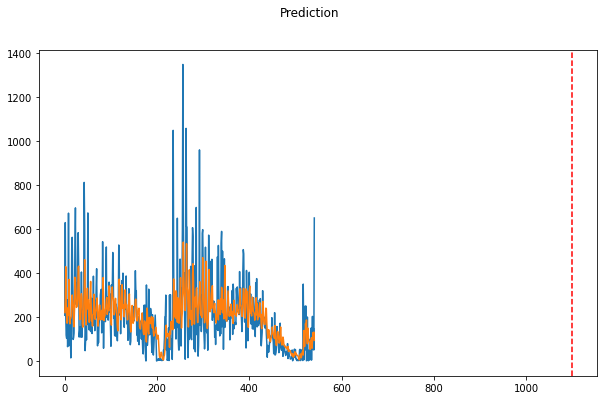

RMSE of validation set: 6.042642455877615
RMSE of entire data set: 3.3319609111171644


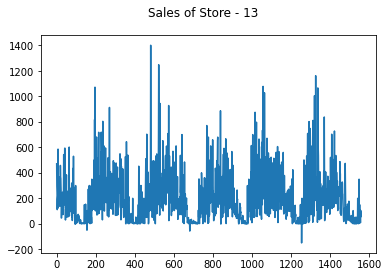

Validation Loss Decreased(inf--->0.03388) 	 Saving The Model
Validation Loss Decreased(0.03388--->0.02255) 	 Saving The Model
Validation Loss Decreased(0.02255--->0.01580) 	 Saving The Model
Validation Loss Decreased(0.01580--->0.01423) 	 Saving The Model
Validation Loss Decreased(0.01423--->0.01420) 	 Saving The Model
Validation Loss Decreased(0.01420--->0.01413) 	 Saving The Model
Validation Loss Decreased(0.01413--->0.01412) 	 Saving The Model
Validation Loss Decreased(0.01412--->0.01410) 	 Saving The Model
Validation Loss Decreased(0.01410--->0.01404) 	 Saving The Model
Validation Loss Decreased(0.01404--->0.01398) 	 Saving The Model
Validation Loss Decreased(0.01398--->0.01393) 	 Saving The Model
Validation Loss Decreased(0.01393--->0.01391) 	 Saving The Model
Validation Loss Decreased(0.01391--->0.01386) 	 Saving The Model
Validation Loss Decreased(0.01386--->0.01378) 	 Saving The Model
Validation Loss Decreased(0.01378--->0.01370) 	 Saving The Model
Validation Loss Decreased(0.0

Validation Loss Decreased(0.01109--->0.01108) 	 Saving The Model
Validation Loss Decreased(0.01108--->0.01108) 	 Saving The Model
Validation Loss Decreased(0.01108--->0.01107) 	 Saving The Model
Validation Loss Decreased(0.01107--->0.01107) 	 Saving The Model
Validation Loss Decreased(0.01107--->0.01106) 	 Saving The Model
Validation Loss Decreased(0.01106--->0.01106) 	 Saving The Model
Validation Loss Decreased(0.01106--->0.01105) 	 Saving The Model
Validation Loss Decreased(0.01105--->0.01105) 	 Saving The Model
Validation Loss Decreased(0.01105--->0.01104) 	 Saving The Model
Validation Loss Decreased(0.01104--->0.01104) 	 Saving The Model
Validation Loss Decreased(0.01104--->0.01103) 	 Saving The Model
Validation Loss Decreased(0.01103--->0.01103) 	 Saving The Model
Validation Loss Decreased(0.01103--->0.01103) 	 Saving The Model
Validation Loss Decreased(0.01103--->0.01102) 	 Saving The Model
Validation Loss Decreased(0.01102--->0.01102) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.01035--->0.01033) 	 Saving The Model
Validation Loss Decreased(0.01033--->0.01032) 	 Saving The Model
Validation Loss Decreased(0.01032--->0.01031) 	 Saving The Model
Validation Loss Decreased(0.01031--->0.01030) 	 Saving The Model
Validation Loss Decreased(0.01030--->0.01029) 	 Saving The Model
Validation Loss Decreased(0.01029--->0.01029) 	 Saving The Model
Validation Loss Decreased(0.01029--->0.01029) 	 Saving The Model
Epoch 300 		 Training Loss: 0.00973 		 Validation Loss: 0.01029
Validation Loss Decreased(0.01029--->0.01029) 	 Saving The Model
Validation Loss Decreased(0.01029--->0.01028) 	 Saving The Model
Validation Loss Decreased(0.01028--->0.01025) 	 Saving The Model
Validation Loss Decreased(0.01025--->0.01025) 	 Saving The Model
Validation Loss Decreased(0.01025--->0.01023) 	 Saving The Model
Validation Loss Decreased(0.01023--->0.01022) 	 Saving The Model
Validation Loss Decreased(0.01022--->0.01021) 	 Saving The Model
Validation Loss Decreased(

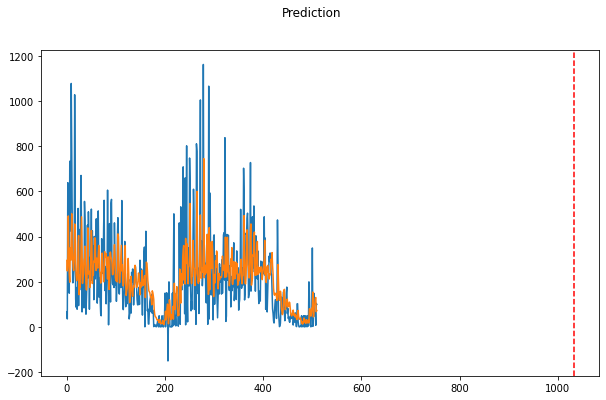

RMSE of validation set: 6.914943738383788
RMSE of entire data set: 3.8856285082326476


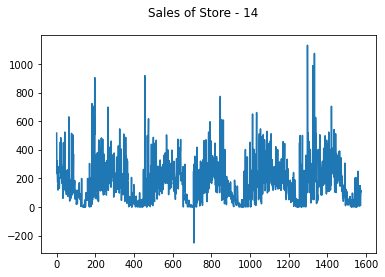

Validation Loss Decreased(inf--->0.06401) 	 Saving The Model
Validation Loss Decreased(0.06401--->0.04197) 	 Saving The Model
Validation Loss Decreased(0.04197--->0.02497) 	 Saving The Model
Validation Loss Decreased(0.02497--->0.01370) 	 Saving The Model
Validation Loss Decreased(0.01370--->0.01022) 	 Saving The Model
Validation Loss Decreased(0.01022--->0.01020) 	 Saving The Model
Validation Loss Decreased(0.01020--->0.01014) 	 Saving The Model
Validation Loss Decreased(0.01014--->0.01009) 	 Saving The Model
Validation Loss Decreased(0.01009--->0.01006) 	 Saving The Model
Validation Loss Decreased(0.01006--->0.01004) 	 Saving The Model
Validation Loss Decreased(0.01004--->0.01003) 	 Saving The Model
Validation Loss Decreased(0.01003--->0.01002) 	 Saving The Model
Validation Loss Decreased(0.01002--->0.00997) 	 Saving The Model
Validation Loss Decreased(0.00997--->0.00991) 	 Saving The Model
Validation Loss Decreased(0.00991--->0.00986) 	 Saving The Model
Validation Loss Decreased(0.0

Validation Loss Decreased(0.00786--->0.00785) 	 Saving The Model
Validation Loss Decreased(0.00785--->0.00784) 	 Saving The Model
Validation Loss Decreased(0.00784--->0.00783) 	 Saving The Model
Validation Loss Decreased(0.00783--->0.00783) 	 Saving The Model
Validation Loss Decreased(0.00783--->0.00782) 	 Saving The Model
Validation Loss Decreased(0.00782--->0.00781) 	 Saving The Model
Validation Loss Decreased(0.00781--->0.00781) 	 Saving The Model
Validation Loss Decreased(0.00781--->0.00780) 	 Saving The Model
Validation Loss Decreased(0.00780--->0.00780) 	 Saving The Model
Validation Loss Decreased(0.00780--->0.00780) 	 Saving The Model
Validation Loss Decreased(0.00780--->0.00779) 	 Saving The Model
Validation Loss Decreased(0.00779--->0.00779) 	 Saving The Model
Validation Loss Decreased(0.00779--->0.00778) 	 Saving The Model
Validation Loss Decreased(0.00778--->0.00778) 	 Saving The Model
Validation Loss Decreased(0.00778--->0.00777) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.00766--->0.00766) 	 Saving The Model
Validation Loss Decreased(0.00766--->0.00765) 	 Saving The Model
Validation Loss Decreased(0.00765--->0.00765) 	 Saving The Model
Validation Loss Decreased(0.00765--->0.00765) 	 Saving The Model
Validation Loss Decreased(0.00765--->0.00765) 	 Saving The Model
Validation Loss Decreased(0.00765--->0.00765) 	 Saving The Model
Validation Loss Decreased(0.00765--->0.00765) 	 Saving The Model
Epoch 500 		 Training Loss: 0.00668 		 Validation Loss: 0.00764
Validation Loss Decreased(0.00765--->0.00764) 	 Saving The Model
Validation Loss Decreased(0.00764--->0.00764) 	 Saving The Model
Validation Loss Decreased(0.00764--->0.00764) 	 Saving The Model
Validation Loss Decreased(0.00764--->0.00764) 	 Saving The Model
Validation Loss Decreased(0.00764--->0.00763) 	 Saving The Model
Validation Loss Decreased(0.00763--->0.00763) 	 Saving The Model
Validation Loss Decreased(0.00763--->0.00763) 	 Saving The Model
Validation Loss Decreased(

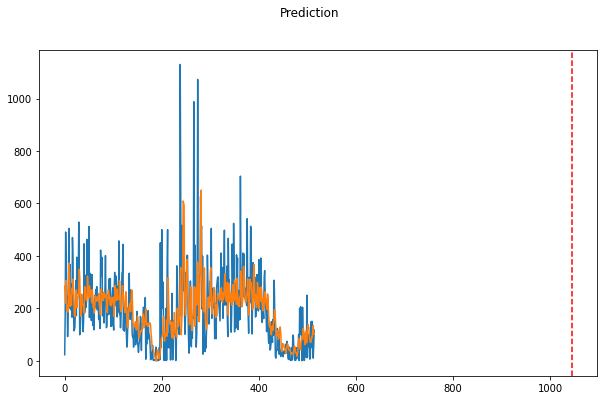

RMSE of validation set: 5.258845232902467
RMSE of entire data set: 2.83251299722736


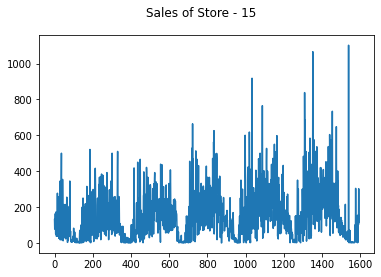

Validation Loss Decreased(inf--->0.09779) 	 Saving The Model
Validation Loss Decreased(0.09779--->0.06546) 	 Saving The Model
Validation Loss Decreased(0.06546--->0.04007) 	 Saving The Model
Validation Loss Decreased(0.04007--->0.02343) 	 Saving The Model
Validation Loss Decreased(0.02343--->0.01896) 	 Saving The Model
Validation Loss Decreased(0.01896--->0.01868) 	 Saving The Model
Validation Loss Decreased(0.01868--->0.01850) 	 Saving The Model
Validation Loss Decreased(0.01850--->0.01838) 	 Saving The Model
Validation Loss Decreased(0.01838--->0.01832) 	 Saving The Model
Validation Loss Decreased(0.01832--->0.01831) 	 Saving The Model
Validation Loss Decreased(0.01831--->0.01830) 	 Saving The Model
Validation Loss Decreased(0.01830--->0.01815) 	 Saving The Model
Validation Loss Decreased(0.01815--->0.01805) 	 Saving The Model
Validation Loss Decreased(0.01805--->0.01799) 	 Saving The Model
Validation Loss Decreased(0.01799--->0.01797) 	 Saving The Model
Validation Loss Decreased(0.0

Validation Loss Decreased(0.01508--->0.01506) 	 Saving The Model
Validation Loss Decreased(0.01506--->0.01505) 	 Saving The Model
Validation Loss Decreased(0.01505--->0.01504) 	 Saving The Model
Validation Loss Decreased(0.01504--->0.01502) 	 Saving The Model
Validation Loss Decreased(0.01502--->0.01501) 	 Saving The Model
Validation Loss Decreased(0.01501--->0.01500) 	 Saving The Model
Validation Loss Decreased(0.01500--->0.01499) 	 Saving The Model
Validation Loss Decreased(0.01499--->0.01497) 	 Saving The Model
Validation Loss Decreased(0.01497--->0.01496) 	 Saving The Model
Validation Loss Decreased(0.01496--->0.01495) 	 Saving The Model
Validation Loss Decreased(0.01495--->0.01493) 	 Saving The Model
Validation Loss Decreased(0.01493--->0.01492) 	 Saving The Model
Validation Loss Decreased(0.01492--->0.01491) 	 Saving The Model
Validation Loss Decreased(0.01491--->0.01490) 	 Saving The Model
Validation Loss Decreased(0.01490--->0.01488) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.01454--->0.01454) 	 Saving The Model
Validation Loss Decreased(0.01454--->0.01454) 	 Saving The Model
Validation Loss Decreased(0.01454--->0.01454) 	 Saving The Model
Validation Loss Decreased(0.01454--->0.01454) 	 Saving The Model
Validation Loss Decreased(0.01454--->0.01453) 	 Saving The Model
Validation Loss Decreased(0.01453--->0.01453) 	 Saving The Model
Validation Loss Decreased(0.01453--->0.01453) 	 Saving The Model
Validation Loss Decreased(0.01453--->0.01453) 	 Saving The Model
Validation Loss Decreased(0.01453--->0.01453) 	 Saving The Model
Validation Loss Decreased(0.01453--->0.01453) 	 Saving The Model
Validation Loss Decreased(0.01453--->0.01453) 	 Saving The Model
Validation Loss Decreased(0.01453--->0.01453) 	 Saving The Model
Validation Loss Decreased(0.01453--->0.01453) 	 Saving The Model
Validation Loss Decreased(0.01453--->0.01453) 	 Saving The Model
Validation Loss Decreased(0.01453--->0.01453) 	 Saving The Model
Validation Loss Decreased

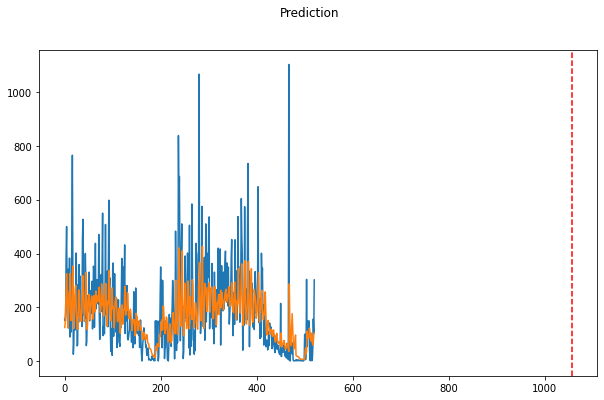

RMSE of validation set: 5.616730313130448
RMSE of entire data set: 2.7538472398869107


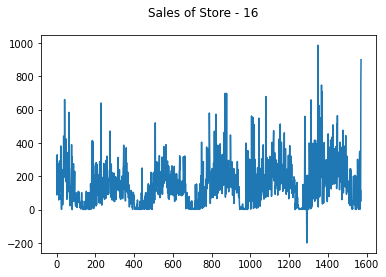

Validation Loss Decreased(inf--->0.23105) 	 Saving The Model
Validation Loss Decreased(0.23105--->0.17704) 	 Saving The Model
Validation Loss Decreased(0.17704--->0.13154) 	 Saving The Model
Validation Loss Decreased(0.13154--->0.09248) 	 Saving The Model
Validation Loss Decreased(0.09248--->0.05926) 	 Saving The Model
Validation Loss Decreased(0.05926--->0.03292) 	 Saving The Model
Validation Loss Decreased(0.03292--->0.01626) 	 Saving The Model
Validation Loss Decreased(0.01626--->0.01300) 	 Saving The Model
Validation Loss Decreased(0.01300--->0.01264) 	 Saving The Model
Validation Loss Decreased(0.01264--->0.01257) 	 Saving The Model
Validation Loss Decreased(0.01257--->0.01254) 	 Saving The Model
Epoch 100 		 Training Loss: 0.00728 		 Validation Loss: 0.01317
Validation Loss Decreased(0.01254--->0.01253) 	 Saving The Model
Validation Loss Decreased(0.01253--->0.01251) 	 Saving The Model
Validation Loss Decreased(0.01251--->0.01248) 	 Saving The Model
Validation Loss Decreased(0.01

Validation Loss Decreased(0.01084--->0.01084) 	 Saving The Model
Validation Loss Decreased(0.01084--->0.01084) 	 Saving The Model
Validation Loss Decreased(0.01084--->0.01083) 	 Saving The Model
Validation Loss Decreased(0.01083--->0.01083) 	 Saving The Model
Validation Loss Decreased(0.01083--->0.01083) 	 Saving The Model
Validation Loss Decreased(0.01083--->0.01083) 	 Saving The Model
Validation Loss Decreased(0.01083--->0.01083) 	 Saving The Model
Validation Loss Decreased(0.01083--->0.01083) 	 Saving The Model
Validation Loss Decreased(0.01083--->0.01082) 	 Saving The Model
Validation Loss Decreased(0.01082--->0.01082) 	 Saving The Model
Validation Loss Decreased(0.01082--->0.01082) 	 Saving The Model
Validation Loss Decreased(0.01082--->0.01082) 	 Saving The Model
Validation Loss Decreased(0.01082--->0.01082) 	 Saving The Model
Validation Loss Decreased(0.01082--->0.01082) 	 Saving The Model
Validation Loss Decreased(0.01082--->0.01081) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.01067--->0.01067) 	 Saving The Model
Validation Loss Decreased(0.01067--->0.01067) 	 Saving The Model
Validation Loss Decreased(0.01067--->0.01067) 	 Saving The Model
Validation Loss Decreased(0.01067--->0.01066) 	 Saving The Model
Validation Loss Decreased(0.01066--->0.01066) 	 Saving The Model
Validation Loss Decreased(0.01066--->0.01066) 	 Saving The Model
Validation Loss Decreased(0.01066--->0.01066) 	 Saving The Model
Validation Loss Decreased(0.01066--->0.01066) 	 Saving The Model
Validation Loss Decreased(0.01066--->0.01066) 	 Saving The Model
Validation Loss Decreased(0.01066--->0.01066) 	 Saving The Model
Validation Loss Decreased(0.01066--->0.01066) 	 Saving The Model
Validation Loss Decreased(0.01066--->0.01066) 	 Saving The Model
Validation Loss Decreased(0.01066--->0.01066) 	 Saving The Model
Validation Loss Decreased(0.01066--->0.01066) 	 Saving The Model
Validation Loss Decreased(0.01066--->0.01066) 	 Saving The Model
Validation Loss Decreased

Epoch 600 		 Training Loss: 0.00558 		 Validation Loss: 0.01063
Epoch 700 		 Training Loss: 0.00556 		 Validation Loss: 0.01064
Epoch 800 		 Training Loss: 0.00555 		 Validation Loss: 0.01066
Epoch 900 		 Training Loss: 0.00555 		 Validation Loss: 0.01066
Epoch 1000 		 Training Loss: 0.00554 		 Validation Loss: 0.01066
Epoch 1100 		 Training Loss: 0.00554 		 Validation Loss: 0.01066
Epoch 1200 		 Training Loss: 0.00553 		 Validation Loss: 0.01066
Epoch 1300 		 Training Loss: 0.00553 		 Validation Loss: 0.01065
Validation Loss Decreased(0.01062--->0.01061) 	 Saving The Model
Validation Loss Decreased(0.01061--->0.01058) 	 Saving The Model
Validation Loss Decreased(0.01058--->0.01057) 	 Saving The Model
Epoch 1400 		 Training Loss: 0.00552 		 Validation Loss: 0.01062
Epoch 1500 		 Training Loss: 0.00551 		 Validation Loss: 0.01064
Validation Loss Decreased(0.01057--->0.01057) 	 Saving The Model
Validation Loss Decreased(0.01057--->0.01055) 	 Saving The Model
Epoch 1600 		 Training Loss: 

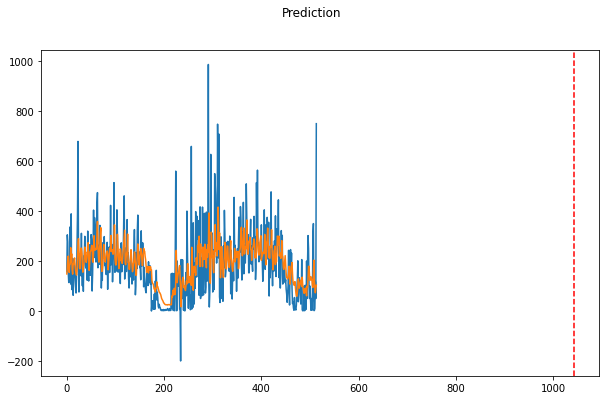

RMSE of validation set: 5.295782031271834
RMSE of entire data set: 2.520526709364777


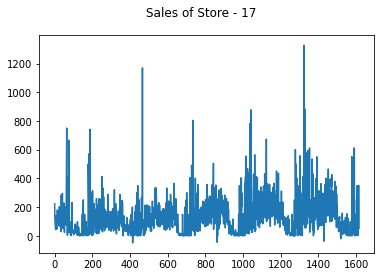

Validation Loss Decreased(inf--->0.10737) 	 Saving The Model
Validation Loss Decreased(0.10737--->0.06818) 	 Saving The Model
Validation Loss Decreased(0.06818--->0.03948) 	 Saving The Model
Validation Loss Decreased(0.03948--->0.02044) 	 Saving The Model
Validation Loss Decreased(0.02044--->0.01121) 	 Saving The Model
Validation Loss Decreased(0.01121--->0.01064) 	 Saving The Model
Validation Loss Decreased(0.01064--->0.01042) 	 Saving The Model
Validation Loss Decreased(0.01042--->0.01039) 	 Saving The Model
Validation Loss Decreased(0.01039--->0.01034) 	 Saving The Model
Validation Loss Decreased(0.01034--->0.01031) 	 Saving The Model
Validation Loss Decreased(0.01031--->0.01030) 	 Saving The Model
Epoch 100 		 Training Loss: 0.00656 		 Validation Loss: 0.01053
Validation Loss Decreased(0.01030--->0.01030) 	 Saving The Model
Validation Loss Decreased(0.01030--->0.01029) 	 Saving The Model
Validation Loss Decreased(0.01029--->0.01027) 	 Saving The Model
Validation Loss Decreased(0.01

Validation Loss Decreased(0.00932--->0.00932) 	 Saving The Model
Validation Loss Decreased(0.00932--->0.00931) 	 Saving The Model
Validation Loss Decreased(0.00931--->0.00931) 	 Saving The Model
Validation Loss Decreased(0.00931--->0.00930) 	 Saving The Model
Validation Loss Decreased(0.00930--->0.00929) 	 Saving The Model
Validation Loss Decreased(0.00929--->0.00929) 	 Saving The Model
Validation Loss Decreased(0.00929--->0.00928) 	 Saving The Model
Validation Loss Decreased(0.00928--->0.00928) 	 Saving The Model
Validation Loss Decreased(0.00928--->0.00927) 	 Saving The Model
Validation Loss Decreased(0.00927--->0.00927) 	 Saving The Model
Validation Loss Decreased(0.00927--->0.00926) 	 Saving The Model
Validation Loss Decreased(0.00926--->0.00926) 	 Saving The Model
Validation Loss Decreased(0.00926--->0.00925) 	 Saving The Model
Validation Loss Decreased(0.00925--->0.00924) 	 Saving The Model
Validation Loss Decreased(0.00924--->0.00924) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.00870--->0.00870) 	 Saving The Model
Validation Loss Decreased(0.00870--->0.00870) 	 Saving The Model
Epoch 400 		 Training Loss: 0.00587 		 Validation Loss: 0.00874
Epoch 500 		 Training Loss: 0.00585 		 Validation Loss: 0.00872
Epoch 600 		 Training Loss: 0.00584 		 Validation Loss: 0.00870
Validation Loss Decreased(0.00870--->0.00870) 	 Saving The Model
Validation Loss Decreased(0.00870--->0.00870) 	 Saving The Model
Validation Loss Decreased(0.00870--->0.00870) 	 Saving The Model
Validation Loss Decreased(0.00870--->0.00870) 	 Saving The Model
Validation Loss Decreased(0.00870--->0.00869) 	 Saving The Model
Validation Loss Decreased(0.00869--->0.00869) 	 Saving The Model
Validation Loss Decreased(0.00869--->0.00869) 	 Saving The Model
Validation Loss Decreased(0.00869--->0.00869) 	 Saving The Model
Validation Loss Decreased(0.00869--->0.00869) 	 Saving The Model
Validation Loss Decreased(0.00869--->0.00869) 	 Saving The Model
Validation Loss Decreased(0.

Validation Loss Decreased(0.00868--->0.00868) 	 Saving The Model
Validation Loss Decreased(0.00868--->0.00868) 	 Saving The Model
Validation Loss Decreased(0.00868--->0.00868) 	 Saving The Model
Validation Loss Decreased(0.00868--->0.00868) 	 Saving The Model
Validation Loss Decreased(0.00868--->0.00867) 	 Saving The Model
Validation Loss Decreased(0.00867--->0.00867) 	 Saving The Model
Validation Loss Decreased(0.00867--->0.00867) 	 Saving The Model
Validation Loss Decreased(0.00867--->0.00867) 	 Saving The Model
Validation Loss Decreased(0.00867--->0.00867) 	 Saving The Model
Validation Loss Decreased(0.00867--->0.00867) 	 Saving The Model
Validation Loss Decreased(0.00867--->0.00867) 	 Saving The Model
Validation Loss Decreased(0.00867--->0.00867) 	 Saving The Model
Validation Loss Decreased(0.00867--->0.00867) 	 Saving The Model
Validation Loss Decreased(0.00867--->0.00867) 	 Saving The Model
Validation Loss Decreased(0.00867--->0.00867) 	 Saving The Model
Validation Loss Decreased

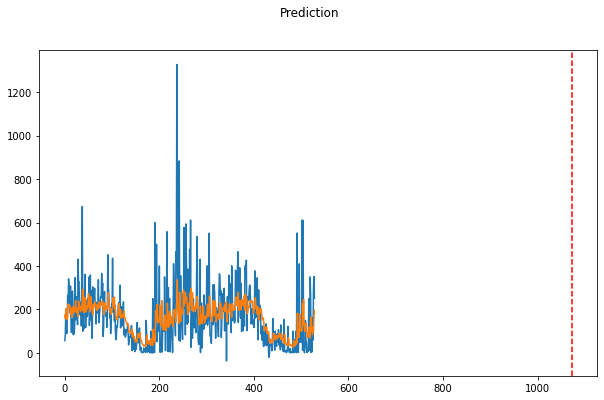

RMSE of validation set: 5.509142001899119
RMSE of entire data set: 2.801705212688283


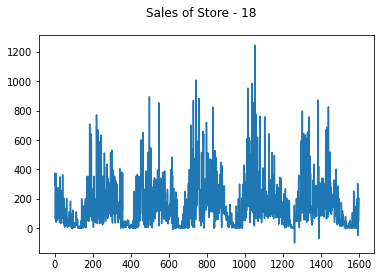

Validation Loss Decreased(inf--->0.01263) 	 Saving The Model
Validation Loss Decreased(0.01263--->0.01219) 	 Saving The Model
Validation Loss Decreased(0.01219--->0.01211) 	 Saving The Model
Validation Loss Decreased(0.01211--->0.01182) 	 Saving The Model
Validation Loss Decreased(0.01182--->0.01175) 	 Saving The Model
Validation Loss Decreased(0.01175--->0.01151) 	 Saving The Model
Validation Loss Decreased(0.01151--->0.01130) 	 Saving The Model
Validation Loss Decreased(0.01130--->0.01119) 	 Saving The Model
Validation Loss Decreased(0.01119--->0.01117) 	 Saving The Model
Validation Loss Decreased(0.01117--->0.01112) 	 Saving The Model
Validation Loss Decreased(0.01112--->0.01098) 	 Saving The Model
Validation Loss Decreased(0.01098--->0.01077) 	 Saving The Model
Validation Loss Decreased(0.01077--->0.01058) 	 Saving The Model
Validation Loss Decreased(0.01058--->0.01049) 	 Saving The Model
Validation Loss Decreased(0.01049--->0.01049) 	 Saving The Model
Validation Loss Decreased(0.0

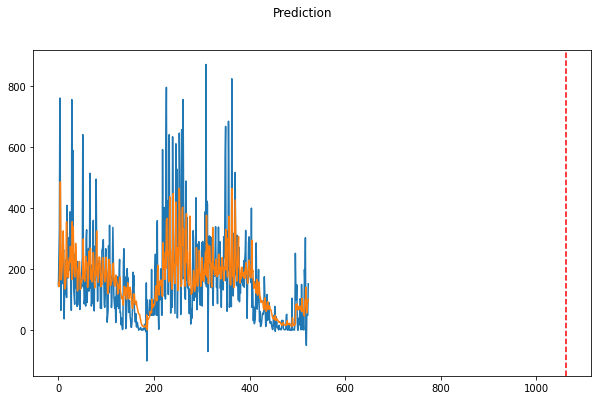

RMSE of validation set: 5.276112615908955
RMSE of entire data set: 3.154184023637205


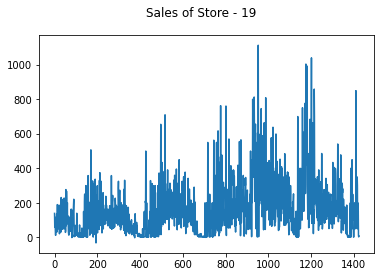

Validation Loss Decreased(inf--->0.06564) 	 Saving The Model
Validation Loss Decreased(0.06564--->0.04857) 	 Saving The Model
Validation Loss Decreased(0.04857--->0.03587) 	 Saving The Model
Validation Loss Decreased(0.03587--->0.02735) 	 Saving The Model
Validation Loss Decreased(0.02735--->0.02330) 	 Saving The Model
Validation Loss Decreased(0.02330--->0.02250) 	 Saving The Model
Validation Loss Decreased(0.02250--->0.02244) 	 Saving The Model
Validation Loss Decreased(0.02244--->0.02214) 	 Saving The Model
Validation Loss Decreased(0.02214--->0.02166) 	 Saving The Model
Validation Loss Decreased(0.02166--->0.02124) 	 Saving The Model
Validation Loss Decreased(0.02124--->0.02091) 	 Saving The Model
Validation Loss Decreased(0.02091--->0.02068) 	 Saving The Model
Validation Loss Decreased(0.02068--->0.02053) 	 Saving The Model
Validation Loss Decreased(0.02053--->0.02040) 	 Saving The Model
Validation Loss Decreased(0.02040--->0.02018) 	 Saving The Model
Validation Loss Decreased(0.0

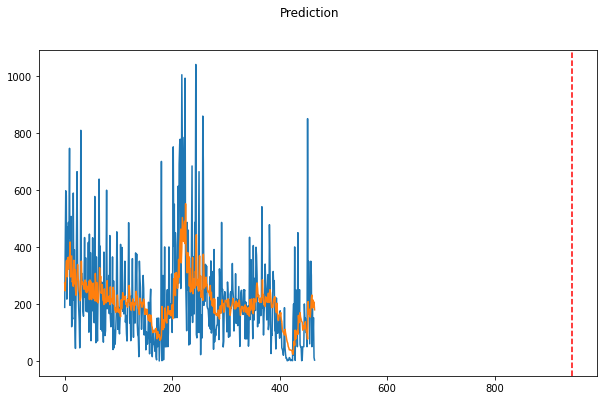

RMSE of validation set: 7.229190239376586
RMSE of entire data set: 3.4458612946458365


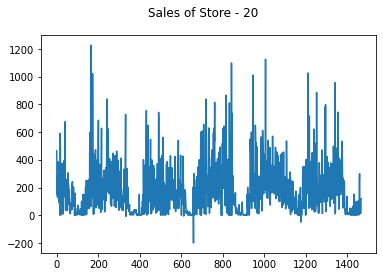

Validation Loss Decreased(inf--->0.14688) 	 Saving The Model
Validation Loss Decreased(0.14688--->0.10776) 	 Saving The Model
Validation Loss Decreased(0.10776--->0.07538) 	 Saving The Model
Validation Loss Decreased(0.07538--->0.04916) 	 Saving The Model
Validation Loss Decreased(0.04916--->0.02920) 	 Saving The Model
Validation Loss Decreased(0.02920--->0.01652) 	 Saving The Model
Validation Loss Decreased(0.01652--->0.01297) 	 Saving The Model
Validation Loss Decreased(0.01297--->0.01293) 	 Saving The Model
Validation Loss Decreased(0.01293--->0.01291) 	 Saving The Model
Validation Loss Decreased(0.01291--->0.01286) 	 Saving The Model
Validation Loss Decreased(0.01286--->0.01285) 	 Saving The Model
Validation Loss Decreased(0.01285--->0.01285) 	 Saving The Model
Validation Loss Decreased(0.01285--->0.01277) 	 Saving The Model
Validation Loss Decreased(0.01277--->0.01272) 	 Saving The Model
Validation Loss Decreased(0.01272--->0.01268) 	 Saving The Model
Validation Loss Decreased(0.0

Validation Loss Decreased(0.01024--->0.01023) 	 Saving The Model
Validation Loss Decreased(0.01023--->0.01022) 	 Saving The Model
Validation Loss Decreased(0.01022--->0.01021) 	 Saving The Model
Validation Loss Decreased(0.01021--->0.01020) 	 Saving The Model
Validation Loss Decreased(0.01020--->0.01019) 	 Saving The Model
Validation Loss Decreased(0.01019--->0.01019) 	 Saving The Model
Validation Loss Decreased(0.01019--->0.01018) 	 Saving The Model
Validation Loss Decreased(0.01018--->0.01017) 	 Saving The Model
Validation Loss Decreased(0.01017--->0.01016) 	 Saving The Model
Validation Loss Decreased(0.01016--->0.01016) 	 Saving The Model
Validation Loss Decreased(0.01016--->0.01015) 	 Saving The Model
Validation Loss Decreased(0.01015--->0.01015) 	 Saving The Model
Validation Loss Decreased(0.01015--->0.01014) 	 Saving The Model
Epoch 200 		 Training Loss: 0.01165 		 Validation Loss: 0.01013
Validation Loss Decreased(0.01014--->0.01013) 	 Saving The Model
Validation Loss Decreased(

Validation Loss Decreased(0.00975--->0.00975) 	 Saving The Model
Validation Loss Decreased(0.00975--->0.00975) 	 Saving The Model
Validation Loss Decreased(0.00975--->0.00975) 	 Saving The Model
Validation Loss Decreased(0.00975--->0.00975) 	 Saving The Model
Validation Loss Decreased(0.00975--->0.00975) 	 Saving The Model
Validation Loss Decreased(0.00975--->0.00975) 	 Saving The Model
Validation Loss Decreased(0.00975--->0.00975) 	 Saving The Model
Validation Loss Decreased(0.00975--->0.00975) 	 Saving The Model
Validation Loss Decreased(0.00975--->0.00975) 	 Saving The Model
Validation Loss Decreased(0.00975--->0.00974) 	 Saving The Model
Validation Loss Decreased(0.00974--->0.00974) 	 Saving The Model
Validation Loss Decreased(0.00974--->0.00974) 	 Saving The Model
Validation Loss Decreased(0.00974--->0.00974) 	 Saving The Model
Validation Loss Decreased(0.00974--->0.00974) 	 Saving The Model
Validation Loss Decreased(0.00974--->0.00974) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased(0.00964--->0.00964) 	 Saving The Model
Validation Loss Decreased

Validation Loss Decreased(0.00959--->0.00959) 	 Saving The Model
Validation Loss Decreased(0.00959--->0.00959) 	 Saving The Model
Validation Loss Decreased(0.00959--->0.00959) 	 Saving The Model
Validation Loss Decreased(0.00959--->0.00959) 	 Saving The Model
Validation Loss Decreased(0.00959--->0.00959) 	 Saving The Model
Validation Loss Decreased(0.00959--->0.00959) 	 Saving The Model
Validation Loss Decreased(0.00959--->0.00959) 	 Saving The Model
Validation Loss Decreased(0.00959--->0.00959) 	 Saving The Model
Validation Loss Decreased(0.00959--->0.00959) 	 Saving The Model
Validation Loss Decreased(0.00959--->0.00959) 	 Saving The Model
Validation Loss Decreased(0.00959--->0.00959) 	 Saving The Model
Validation Loss Decreased(0.00959--->0.00959) 	 Saving The Model
Validation Loss Decreased(0.00959--->0.00958) 	 Saving The Model
Validation Loss Decreased(0.00958--->0.00958) 	 Saving The Model
Validation Loss Decreased(0.00958--->0.00958) 	 Saving The Model
Validation Loss Decreased

Epoch 1700 		 Training Loss: 0.01027 		 Validation Loss: 0.00931
Epoch 1800 		 Training Loss: 0.00992 		 Validation Loss: 0.00960
Epoch 1900 		 Training Loss: 0.00984 		 Validation Loss: 0.00989
Epoch 2000 		 Training Loss: 0.00958 		 Validation Loss: 0.00963
Epoch 2100 		 Training Loss: 0.00896 		 Validation Loss: 0.00977
Epoch 2200 		 Training Loss: 0.00847 		 Validation Loss: 0.00965
Epoch 2300 		 Training Loss: 0.00723 		 Validation Loss: 0.01103
Epoch 2400 		 Training Loss: 0.00675 		 Validation Loss: 0.01125
Epoch 2500 		 Training Loss: 0.00696 		 Validation Loss: 0.01108
Epoch 2600 		 Training Loss: 0.00596 		 Validation Loss: 0.01224
Epoch 2700 		 Training Loss: 0.00541 		 Validation Loss: 0.01244
Epoch 2800 		 Training Loss: 0.00508 		 Validation Loss: 0.01260
Epoch 2900 		 Training Loss: 0.00494 		 Validation Loss: 0.01276
Stopping the training early		Model saved
	Training Loss:  0.004858640022575855
	Validation Loss:  0.008849604055285454


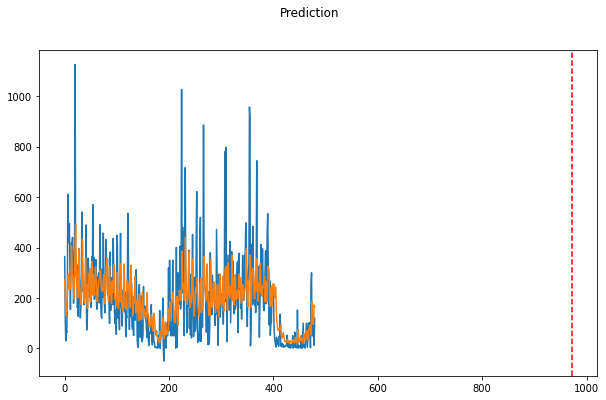

RMSE of validation set: 6.127245327520051
RMSE of entire data set: 3.7092655445999814


In [8]:
for store in range(1,21):
    training_set = dataset[dataset["SCRUB_STORE_NO"] == store]

    training_set = training_set.iloc[:,2:3].values

    plt.plot(training_set, label = 'Sales')
    plt.suptitle('Sales of Store - {}'.format(store))
    plt.show()

    sc = MinMaxScaler()
    training_data = sc.fit_transform(training_set)

    seq_length = 14
    x, y = sliding_windows(training_data, seq_length)

    train_size = int(len(y) * 0.67)
    test_size = len(y) - train_size

    dataX = Variable(torch.Tensor(np.array(x)))
    dataY = Variable(torch.Tensor(np.array(y)))

    trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
    trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

    testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
    testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

    '''-------------------------------------------------------------------------------------------------------------'''

    logger = Logger("./logs/model-1/training_log_store_{}.txt".format(store))

    PATH='./saved-models/model-1/saved_model_store_{}.pth'.format(store)

    num_epochs = 4000
    learning_rate = 0.01

    input_size = 1
    hidden_size = 15
    num_layers = 1

    num_classes = 1

    lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

    criterion = torch.nn.MSELoss()    # mean-squared error for regression
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
    #optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

    min_valid_loss = np.inf

    current_threshold = 0
    cutoff_threshold = 2000

    '''Logging the parameters'''
    logger.log("\tNumber of epochs :\t{}".format(num_epochs))
    logger.log("\tLearning Rate :\t{}".format(learning_rate))
    logger.log("\tInput size : {}".format(input_size))
    logger.log("\tNumber of layers : {}".format(num_layers))
    logger.log("\tNumber of classes : {}".format(num_classes))
    logger.log("\tLoss function : {}".format("MSE"))
    logger.log("\tOptimizer : {}".format("ADAM"))

    # Train the model

    logger.log("\t :Training model\n------------------")
    for epoch in range(num_epochs):
        lstm.train()
        '''---training---'''
        train_loss = 0.0
        outputs = lstm(trainX)
        optimizer.zero_grad()

        # obtain the loss function
        loss = criterion(outputs, trainY)

        loss.backward()

        optimizer.step()

        train_loss = loss.item()

        '''---validation---'''
        valid_loss = 0.0
        lstm.eval() 

        outputs = lstm(testX)

        loss = criterion(outputs,testY)

        valid_loss += loss.item()

        if (epoch + 1) % 100 == 0:
            print('Epoch %d \t\t Training Loss: %1.5f \t\t Validation Loss: %1.5f'%(epoch+1,train_loss,valid_loss))
            logger.log('Epoch %d \t\t Training Loss: %1.5f \t\t Validation Loss: %1.5f'%(epoch+1,train_loss,valid_loss))

        if min_valid_loss > valid_loss:
            current_threshold = 0
            print(f'Validation Loss Decreased({min_valid_loss:1.5f}--->{valid_loss:1.5f}) \t Saving The Model')
            logger.log(f'Validation Loss Decreased({min_valid_loss:1.5f}--->{valid_loss:1.5f}) \t Saving The Model')
            min_valid_loss = valid_loss

            # Saving State Dict
            torch.save(lstm.state_dict(), PATH)
        else:
            current_threshold += 1

            if current_threshold == cutoff_threshold:
                print("Stopping the training early\t\tModel saved")
                print("\tTraining Loss: ",train_loss)
                print("\tValidation Loss: ",min_valid_loss)

                logger.log("Stopping the training early\t\tModel saved")
                logger.log("\tTraining Loss: {}".format(train_loss))
                logger.log("\tValidation Loss: {}".format(min_valid_loss))
                logger.log("\n\n\n")

                break


    lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
    lstm.load_state_dict(torch.load(PATH))
    lstm.eval()

    train_predict = lstm(testX)

    data_predict = train_predict.data.numpy()
    dataY_plot = testY.data.numpy()

    data_predict = sc.inverse_transform(data_predict)
    dataY_plot = sc.inverse_transform(dataY_plot)

    plt.figure(figsize=(10,6))

    plt.axvline(x=train_size, c='r', linestyle='--')

    plt.plot(dataY_plot)
    plt.plot(data_predict)
    plt.suptitle('Prediction')
    plt.show()

    print("RMSE of validation set: {}".format(RMSE(data_predict,dataY_plot)))
    logger.log("RMSE of validation set: {}".format(RMSE(data_predict,dataY_plot)))

    train_predict = lstm(dataX)

    data_predict = train_predict.data.numpy()
    dataY_plot = dataY.data.numpy()

    data_predict = sc.inverse_transform(data_predict)
    dataY_plot = sc.inverse_transform(dataY_plot)

    print("RMSE of entire data set: {}".format(RMSE(data_predict,dataY_plot)))
    logger.log("RMSE of entire data set: {}".format(RMSE(data_predict,dataY_plot)))

    logger.log("\n\n\n")
    logger.stop()